In [1]:
import testing
import numpy as np
import nummericalResources as nr
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import copy

lightColor = "#8bb1cc"
darkColor = "#0f4c75"

plt.rcParams["text.usetex"] = False
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Dejavu Serif'
plt.rcParams["mathtext.fontset"] = "cm"

plt.rcParams['animation.writer'] = 'ffmpeg'
plt.rcParams['animation.ffmpeg_path'] = 'C:\\ffmpeg\\bin\\ffmpeg.exe'


energy states:  [3, 4]
num energy states:  2
start proj generation...
energy states:  [3, 4]
adding state(s):  [6, 2]
current config:  [3, 4, 6, 2]
removing state(s):  [6, 2]
current config:  [3, 4]


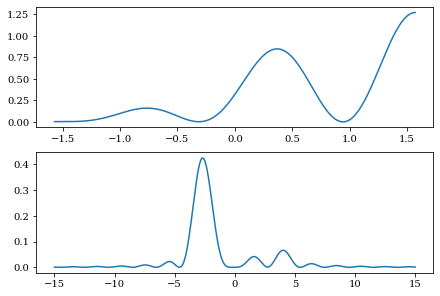

In [3]:
# Testing the BRAND NEW particle in a box class
L = np.pi
gamma = 0.00001
m = 1
bound = 15
x = np.linspace(-L/2, L/2, 500)
k = np.arange(-bound, bound, 0.01)
kn = np.arange(-bound, bound, 1)

energy_proj = testing.Energy_Space_Projection(L, gamma, m, [3,4], [1,1])
print("energy states: ", energy_proj._energy_states)

new_state = testing.Particle_in_Box_State_v2(energy_proj)
new_state.add_energy_states([6,2], [1,1])
new_state.remove_energy_state([6, 2])

pos_space_func = new_state.x_space_wavefunction
cont_m_space_func = new_state.k_space_wavefunction
disc_m_space_func = new_state.new_k_space_wavefunction


'''
fig = plt.figure()
pDistrPlot = plt.axes()


pDistrPlot.bar(kn, np.abs(disc_m_space_func(kn, 0))**2, color=lightColor)
pDistrPlot.plot(k, np.abs(cont_m_space_func(k, 0))**2, color=darkColor, ls="--")

pDistrPlot.set_ylim(0, 0.5)
'''

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=1, height_ratios=[1,1])
pDistrPlot = fig.add_subplot(gs[1,0])
xDistrPlot = fig.add_subplot(gs[0, 0])

linesP = pDistrPlot.plot(k, np.abs(cont_m_space_func(k, 0)**2))
linesX = xDistrPlot.plot(x, np.abs(pos_space_func(x, 0))**2)


def init():
    linesX[0].set_data(x, np.abs(pos_space_func(x, 0))**2)
    linesP[0].set_data(k, np.abs(cont_m_space_func(k, 0)**2))
    return linesX + linesP

def animate(i):
    linesX[0].set_data(x, np.abs(pos_space_func(x, 0.025*i))**2)
    linesP[0].set_data(k, np.abs(cont_m_space_func(k, 0.025*i)**2))
    return linesX + linesP

anim = FuncAnimation(fig, animate, init_func=init, frames=100, interval=20, blit=True)
anim.save("new_split_up_classes_patched.gif")

adding state(s):  [3, 4]
current config:  [3, 4]
adding state(s):  [6, 2]
current config:  [3, 4, 6, 2]
removing state(s):  [6, 2]
current config:  [3, 4]
recomputing all momentum projection coefficients...
removing state(s):  [3, 4]
current config:  []
adding state(s):  [3, 4]
current config:  [3, 4]
Normalization:  1.0000000000000002


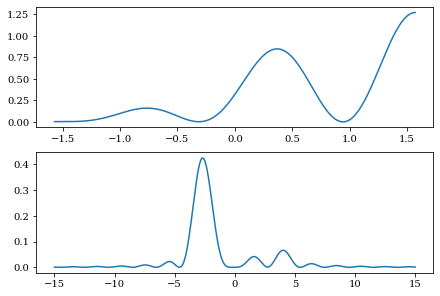

In [4]:
# Testing the (old) new implementation of the momentum space wavefunction
L = np.pi
gamma = 10000
bound = 15


State3 = testing.Particle_in_Box_State(gamma, L, [3,4],[1,1])
State3.add_state([6,2],[1,1])
State3.remove_state([6,2])

State3.gamma = 0.00001
State3.property_change_complete_recompute()

print("Normalization: ", np.sum(np.abs(State3._energy_proj_coeff)**2))

x = np.linspace(-L/2, L/2, 500)
k = np.arange(-bound, bound, 0.01)
kn = np.arange(-bound, bound, 1)


pos_space_func = State3.x_space_wavefunc
cont_m_space_func = State3.cont_k_space_wavefunc
disc_m_space_func = State3.disc_k_space_wavefunc

test = testing.None_Function()
pos_space_func = pos_space_func + test

'''
fig = plt.figure()
pDistrPlot = plt.axes()


pDistrPlot.bar(kn, np.abs(disc_m_space_func(kn, 0))**2, color=lightColor)
pDistrPlot.plot(k, np.abs(cont_m_space_func(k, 0))**2, color=darkColor, ls="--")

pDistrPlot.set_ylim(0, 0.5)
'''

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=1, height_ratios=[1,1])
pDistrPlot = fig.add_subplot(gs[1,0])
xDistrPlot = fig.add_subplot(gs[0, 0])

linesP = pDistrPlot.plot(k, np.abs(cont_m_space_func(k, 0)**2))
linesX = xDistrPlot.plot(x, np.abs(pos_space_func(x, 0))**2)


def init():
    linesX[0].set_data(x, np.abs(pos_space_func(x, 0))**2)
    linesP[0].set_data(k, np.abs(cont_m_space_func(k, 0)**2))
    return linesX + linesP

def animate(i):
    linesX[0].set_data(x, np.abs(pos_space_func(x, 0.025*i))**2)
    linesP[0].set_data(k, np.abs(cont_m_space_func(k, 0.025*i)**2))
    return linesX + linesP

anim = FuncAnimation(fig, animate, init_func=init, frames=100, interval=20, blit=True)
anim.save("new_split_up_classes_v0.gif")





In [ ]:
# Testing momentum distribution (general case with gamma_+ = gamm_- =: gamma)
L = np.pi
gamma = 100
l = 5
bound = 15
cStep = 0.01
dStep = 1
x = np.linspace(-L/2, L/2, 500)
k = np.arange(-bound, bound+cStep, cStep)*np.pi/L
kn = np.arange(-bound, bound+dStep, dStep)*np.pi/L
# Computing all kl values corresponding to gamma
allKl = nr.gamma_to_k(gamma, l, L)
# Computing the continuous momentum prob. density (old concept)
distr = nr.P_momentumContinuous(k, allKl, l, L)
# Computing the discrete monmentum prob. dirst. (new concept)
distrDisc = nr.getP_momentumDiscrete(kn, allKl, l, L)

fig = plt.figure()
pDistrPlot = plt.axes()

pDistrPlot.plot(k, distr[0], c=darkColor, ls="--",label=r"Probalbility Density $\left\vert \langle k \vert l \rangle \right\vert^2$")
pDistrPlot.bar(kn, distrDisc[0], color=lightColor,label=r"Probability Distribution $\left\vert \langle n \vert l \rangle \right\vert^2$")
pDistrPlot.set_xlabel("$k$")
pDistrPlot.set_ylabel("Probability Distribution / Density")
pDistrPlot.legend(loc="upper left")
pDistrPlot.grid(True, which="major", axis="y", lw=0.5, c="0.8")

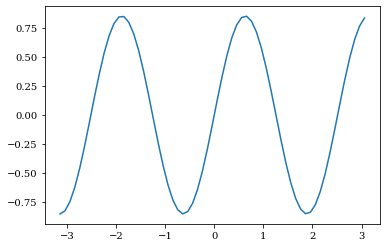

In [15]:
firstFunc = testing.Function_of_x_and_t(lambda x,t: testing.psi_l_Pos_even(np.pi, 2.5, x))
#secondFunc = firstFunc + firstFunc
x = np.arange(-np.pi, np.pi, 0.1)


thirdFunc = testing.Function_of_x_and_t(lambda x, t: 0)
thirdFunc = thirdFunc + firstFunc


plt.plot(x, thirdFunc(x, 0))

In [24]:
# Tests on referencing 1
import copy

class C:
    def __init__(self, arr):
        self.alist = np.array(arr)
    
    def test(self):
        acopy = self.alist
        self.alist = None
        self.alist = acopy

c = C([1,2,3,4])
c.test()
c.alist

[1, 2, 3, 4]

In [6]:
# Tests on refenrencing 2
class A:
    def __init__(self, a):
        self.aValue = a

class B:
    def __init__(self, A: A):
        self.CONSTANT = A
    
    def BPrint(self):
        print(self.CONSTANT.aValue)

aInst = A(1)
bInst = B(aInst)

aInst.aValue = 2
aInst2 = A("eis")
bInst.BPrint()
bInst.CONSTANT.aValue = 3
print(aInst.aValue)
bInst.CONSTANT = aInst2

2
3


In [18]:
# Test on inheritance

class Base:
    def __init__(self, value):
        self._value = value

    def __call__(self):
        print("Base class __call__")

    def increment(self, value):
        self._value += value
    
class Child(Base):
    def __init__(self, value1):
        Base.__init__(self, value1)
        super().increment(2)

    def __call__(self):
        Base.__call__(self)

    def increment(self):
        print("increment now behaves differently")      

c = Child(1)

c()
c._value
c.increment()

Base class __call__
increment now behaves differently
